## 1. Load Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from math import radians, cos, sin, asin, sqrt # 거리 데이터 처리에 필요

from sklearn.metrics import  mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False

## 2. Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
dt_info = pd.read_csv('data/data_info.csv') # 데이터 컬럼 정보
sub = pd.read_csv('data/sample_submission.csv') # 제출용 파일

## 3. 데이터 확인

### 3-1. TRAIN

In [3]:
# 상위 3개의 행 살펴보기
train.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0


In [4]:
# 데이터 쉐입 살펴보기
train.shape

(4701217, 23)

In [5]:
# 데이터 세부 정보 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [6]:
# 세부 정보에서 결측값 확인할 수 없어, column 별  결측값 합 확인
# 결측값 존재하지 않음
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

### 3-2. TEST

In [7]:
# 상위 3개의 행 살펴보기
test.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음


In [8]:
# 데이터 쉐입 살펴보기
test.shape

(291241, 22)

In [9]:
# 데이터 세부 정보 살펴보기
# 결측값 확인 가능
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [10]:
# 세부 정보에서 결측값 확인할 수 있지만, 확실하게 알아보고 싶어  column 별 결측값 합 확인
# 결측값 존재하지 않음
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

## 4. EDA

### 4-1. `day_of_week` (요일)

- train 데이터는 모든 요일이 균등하게 분포함
- 특정 요일이 결과에 영향을 미치지 않으므로, oversampling 진행하지 않음

In [11]:
# 데이터별 개수 확인
train['day_of_week'].value_counts()

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64

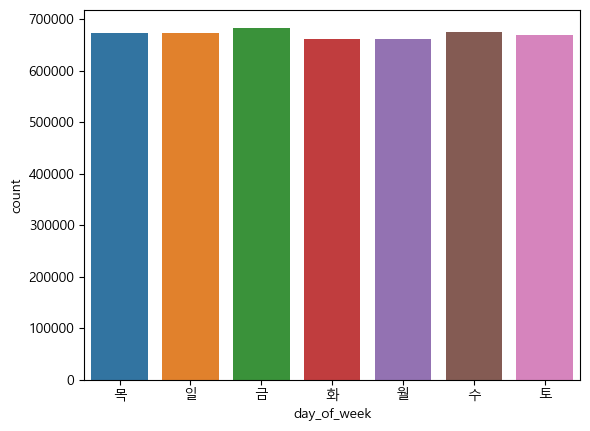

In [18]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'day_of_week', data = train)
plt.show()

- test 데이터는 `월`, `화`, `수` 요일이 다른 요일에 비해 두드러지게 많음

In [ ]:
# 데이터별 개수 확인
test['day_of_week'].value_counts()

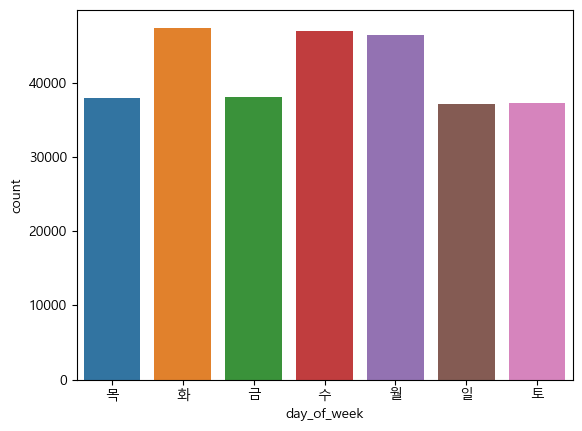

In [19]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'day_of_week', data = test)
plt.show()

### 4-2. `base_hour` (시간대)

- 첨두시인 출·퇴근 시간에 교통량이 눈에 띄게 많을 것이라고 예상함
- 예상과 다르게, 새벽 시간대에 분포가 적고, 눈에 띄게 많은 통행량을 가진 시간대는 없이 완만한 곡선의 형태가 나타남

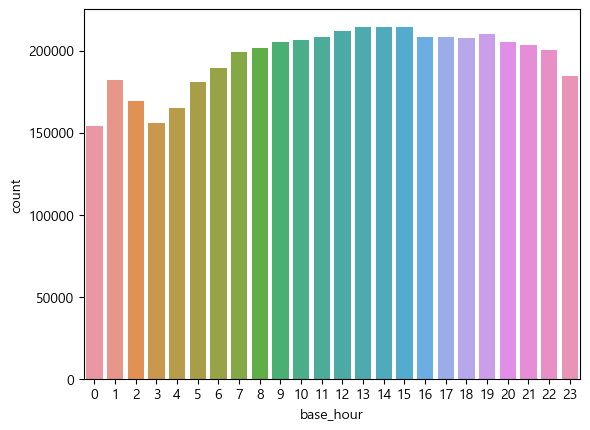

In [22]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'base_hour', data = train)
plt.show()

- test 데이터 역시 새벽 시간대 분포가 적고, 완만한 곡선의 형태가 아닌 분포가 거의 동일한 직선의 형태가 나타남

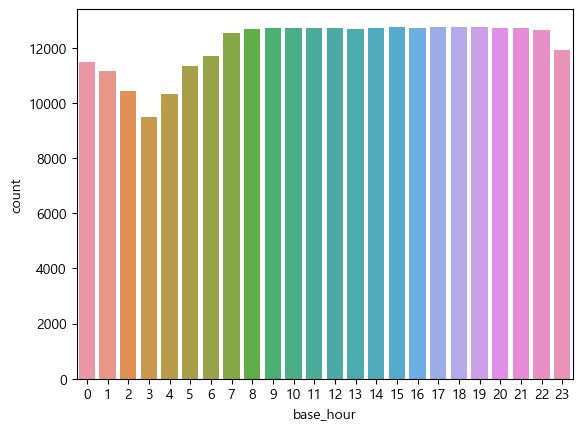

In [23]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'base_hour', data = test)
plt.show()

발표 후 추가 EDA

### 4-3. `Target`

- 타겟 변수의 분포를 확인
- 이상치가 존재하기는 하나, 모든 차량이 통행 속도를 지키지는 않으므로 제거하지 않고 진행하였음

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0eac418b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0eac41df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0eac41610>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0eac4e370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0eac4e610>],
 'means': []}

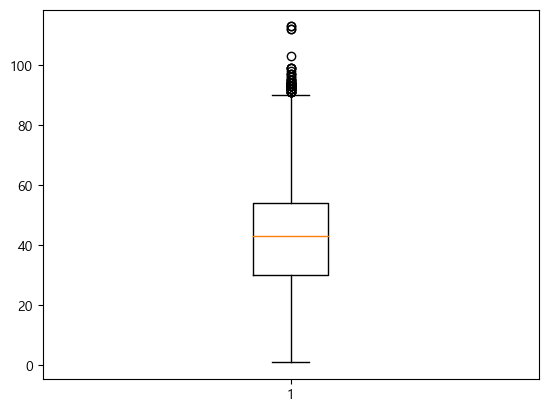

In [109]:
plt.boxplot(train['target'])

### 4-4. 상관관계 확인

- 회귀 문제이므로, 어떠한 변수가 얼마나 영향을 미치는지 확인해볼 필요 있음

- `target` 변수와 가장 높은 상관계수를 갖는 변수는 `maximum_speed_limit`으로 상관계수 0.425715	

In [115]:
train.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_23176\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_date,1.000000,-0.008645,0.011463,0.018547,0.000832,-0.010633,-0.018713,NaN,-0.011030,NaN,-0.004599,-0.016818,-0.004954,-0.016786,-0.004972,-0.033997
base_hour,-0.008645,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,0.011463,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.018547,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.000832,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.010633,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.018713,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.011030,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_23176\3387755817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(train.corr(), annot = True)


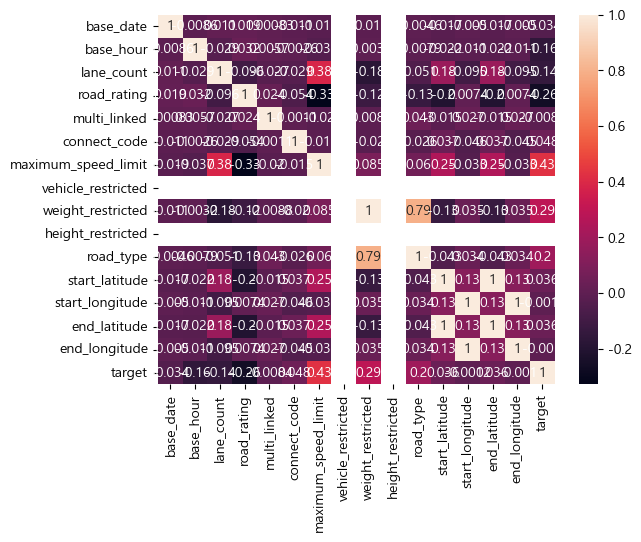

In [111]:
ax = sns.heatmap(train.corr(), annot = True)
plt.show()

## 5. 데이터셋 분리

추후, validation set 처리 다르게 하기 위하여 먼저 분리 작업 수행 후, 전처리 작업 수행

In [24]:
split_train = train.drop('target', axis = 1)
split_target = train['target']

x_train, x_valid, y_train, y_valid = train_test_split(split_train, split_target, test_size = 0.2, random_state = 42)

## 6. 데이터 전처리

- 이미 진행한 전처리로도, 성능이 꽤 괜찮게 나와 발표 후 추가 전처리는 진행하지 않음
- 더 많은 feature를 추가하면 더 좋은 성능이 나올 수 있겠지만, 개인적으로 따로 추가하는 feature들에 대해 정확한 이해가 부족하여 납득이 가는 기존 전처리로 진행함

### 6-1. `base_date` (날짜)

- 년/월/일에 따라 결과에 다른 영향을 미칠 것이라고 예상
- 하나의 데이터를 3개의 column으로 나누어 생성

In [25]:
## train set 처리
# 숫자형식이므로, 문자형으로 변경
x_train = x_train.astype({'base_date' : 'str'})

# 날짜 형식으로 변환해주기
x_train['date'] = pd.to_datetime(x_train['base_date'])

# 년/월/일 쪼갠 후, 기존 column 삭제
x_train['year'] = x_train['date'].dt.year
x_train['month'] = x_train['date'].dt.month
x_train['day'] = x_train['date'].dt.day

x_train.drop(['base_date', 'date'], axis = 1, inplace = True)

x_train.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
1425306,TRAIN_1425306,수,5,1,106,지방도97호선,0,0,60.0,0.0,...,33.452688,126.709277,없음,대원교,33.438329,126.732032,없음,2022,3,9
981507,TRAIN_0981507,일,13,1,103,일반국도99호선,0,0,60.0,0.0,...,33.255663,126.434978,없음,회수사거리,33.263239,126.443826,없음,2022,7,17
4006446,TRAIN_4006446,화,14,2,103,일반국도16호선,0,0,60.0,0.0,...,33.265431,126.565134,없음,동홍교,33.265365,126.564924,없음,2021,11,2


In [26]:
## validation set 처리
# 숫자형식이므로, 문자형으로 변경
x_valid = x_valid.astype({'base_date' : 'str'})

# 날짜 형식으로 변환해주기
x_valid['date'] = pd.to_datetime(x_valid['base_date'])

# 년/월/일 쪼갠 후, 기존 column 삭제
x_valid['year'] = x_valid['date'].dt.year
x_valid['month'] = x_valid['date'].dt.month
x_valid['day'] = x_valid['date'].dt.day

x_valid.drop(['base_date', 'date'], axis = 1, inplace = True)

x_valid.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
1668774,TRAIN_1668774,일,2,2,103,일반국도12호선,0,0,60.0,0.0,...,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,2022,1,23
299795,TRAIN_0299795,토,11,3,106,번영로,0,0,70.0,0.0,...,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,2022,7,9
2245633,TRAIN_2245633,토,12,1,107,산서로,0,0,50.0,0.0,...,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,2022,7,9


In [27]:
## test 데이터셋 처리
# 숫자형식이므로, 문자형으로 변경
test = test.astype({'base_date' : 'str'})

# 날짜 형식으로 변환해주기
test['date'] = pd.to_datetime(test['base_date'])

# 년/월/일 쪼갠 후, 기존 column 삭제
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

test.drop(['base_date', 'date'], axis = 1, inplace = True)

test.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
0,TEST_000000,목,17,3,107,연삼로,0,0,70.0,0.0,...,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음,2022,8,25
1,TEST_000001,화,12,2,103,일반국도12호선,0,0,70.0,0.0,...,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음,2022,8,9
2,TEST_000002,금,2,1,103,일반국도16호선,0,0,60.0,0.0,...,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음,2022,8,5


- 어떤 월(`month`)에 가장 많이 분포되어있는지 확인
    - **12월**에 가장 많이 분포

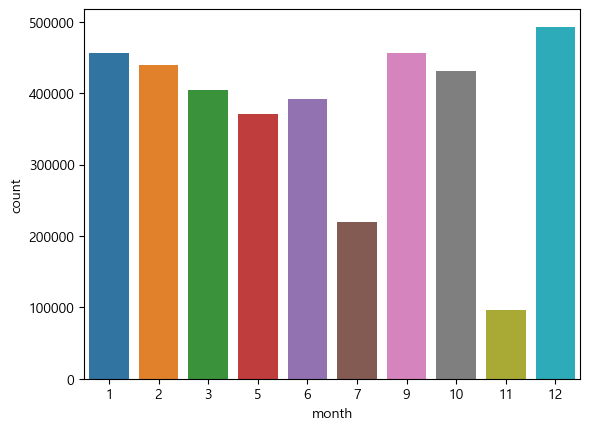

In [29]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'month', data = x_train)
plt.show()

- 어떤 일(`day`)에 가장 많이 분포되어있는지 확인
    - **3일**에 가장 많이 분포

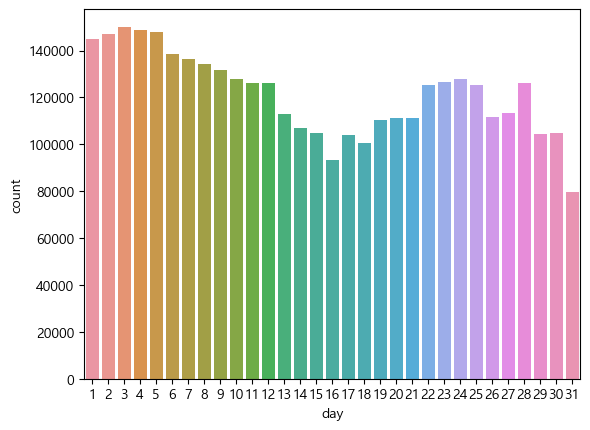

In [30]:
# 시각적으로 파악하기 위하여 plot
sns.countplot(x = 'day', data = x_train)
plt.show()

### 6-2. `day_of_week` (요일) 

머신러닝 알고리즘은 문자 형태의 값을 입력받을 수 없으므로, 피처 형태로 변환해주기 위하여 인코딩 진행

- Baseline에서 사용한 Label Encoder는 일괄적인 숫자 값으로 변환이 되며, 아무 의미 없는 값들에 의미를 부여하여 학습하게 되어 회귀 모델에서는 성능이 떨어질 수 있음을 확인하여 사용하지 않음

In [31]:
# 인코더 정의
ohe = OneHotEncoder(sparse = False)

In [32]:
## train set 처리
train_encoder = ohe.fit_transform(x_train[['day_of_week']])

## 결과는 array이므로 데이터프레임으로 변환
train_encoder = pd.DataFrame(train_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
train_encoder = train_encoder.astype(dtype = 'int64')

# 기존 데이터와 인코딩 데이터의 인덱스가 맞지 않음
# 기존 데이터 인덱스 리셋
x_train.reset_index(drop = True, inplace = True)

# 기존 column 삭제 후, x_train set과 encoding 데이터 병합
x_train = x_train.drop(['day_of_week'], axis = 1)
x_train = pd.concat([x_train, train_encoder], axis = 1)

x_train.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TRAIN_1425306,5,1,106,지방도97호선,0,0,60.0,0.0,0.0,...,2022,3,9,0,0,1,0,0,0,0
1,TRAIN_0981507,13,1,103,일반국도99호선,0,0,60.0,0.0,0.0,...,2022,7,17,0,0,0,0,1,0,0
2,TRAIN_4006446,14,2,103,일반국도16호선,0,0,60.0,0.0,32400.0,...,2021,11,2,0,0,0,0,0,0,1


In [33]:
## validation set 처리
train_encoder = ohe.transform(x_valid[['day_of_week']]) # train 후, test 할 데이터이므로 fit 하지 않음

## 결과는 array이므로 데이터프레임으로 변환
train_encoder = pd.DataFrame(train_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
train_encoder = train_encoder.astype(dtype = 'int64')

# 기존 데이터와 인코딩 데이터의 인덱스가 맞지 않음
# 기존 데이터 인덱스 리셋
x_valid.reset_index(drop = True, inplace = True)

# 기존 column 삭제 후, x_valid set과 encoding 데이터 병합
x_valid = x_valid.drop(['day_of_week'], axis = 1)
x_valid = pd.concat([x_valid, train_encoder], axis = 1)

x_valid.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TRAIN_1668774,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,...,2022,1,23,0,0,0,0,1,0,0
1,TRAIN_0299795,11,3,106,번영로,0,0,70.0,0.0,0.0,...,2022,7,9,0,0,0,0,0,1,0
2,TRAIN_2245633,12,1,107,산서로,0,0,50.0,0.0,0.0,...,2022,7,9,0,0,0,0,0,1,0


In [34]:
## test set 처리
test_encoder = ohe.transform(test[['day_of_week']]) # test 데이터는 fit 하지 않음

## 결과는 array이므로 데이터프레임으로 변환
test_encoder = pd.DataFrame(test_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
test_encoder = test_encoder.astype(dtype = 'int64')

# 기존 column 삭제 후, test set과 encoding 데이터 병합
test = test.drop(['day_of_week'], axis = 1)
test = pd.concat([test, test_encoder], axis = 1)

test.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TEST_000000,17,3,107,연삼로,0,0,70.0,0.0,0.0,...,2022,8,25,0,1,0,0,0,0,0
1,TEST_000001,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,...,2022,8,9,0,0,0,0,0,0,1
2,TEST_000002,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,...,2022,8,5,1,0,0,0,0,0,0


### 6-3. 거리 데이터 (두 지점 사이의 거리)

- 데이콘의 얼라인(align) 팀 전처리 코드 참고
- Haversine(하버사인) 공식으로 두 지점의 위·경도를 사용하여 거리를 구함
- 출처 https://www.kaggle.com/code/speedoheck/calculate-distance-with-geo-coordinates/notebook

In [35]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):

    # convert decimal degrees to radians
    lon1 = row['start_longitude']
    lat1 = row['start_latitude']
    lon2 = row['end_longitude']
    lat2 = row['end_latitude']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    
    return km

In [36]:
## train set 처리
x_train['distance'] = x_train.apply(haversine, axis=1)
x_train.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TRAIN_1425306,5,1,106,지방도97호선,0,0,60.0,0.0,0.0,...,3,9,0,0,1,0,0,0,0,2.645434
1,TRAIN_0981507,13,1,103,일반국도99호선,0,0,60.0,0.0,0.0,...,7,17,0,0,0,0,1,0,0,1.176784
2,TRAIN_4006446,14,2,103,일반국도16호선,0,0,60.0,0.0,32400.0,...,11,2,0,0,0,0,0,0,1,0.020828


In [37]:
## validation set 처리
x_valid['distance'] = x_valid.apply(haversine, axis=1)
x_valid.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TRAIN_1668774,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,...,1,23,0,0,0,0,1,0,0,0.157871
1,TRAIN_0299795,11,3,106,번영로,0,0,70.0,0.0,0.0,...,7,9,0,0,0,0,0,1,0,2.073819
2,TRAIN_2245633,12,1,107,산서로,0,0,50.0,0.0,0.0,...,7,9,0,0,0,0,0,1,0,0.168180


In [38]:
## test set 처리
test['distance'] = test.apply(haversine, axis=1)
test.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TEST_000000,17,3,107,연삼로,0,0,70.0,0.0,0.0,...,8,25,0,1,0,0,0,0,0,0.278752
1,TEST_000001,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,...,8,9,0,0,0,0,0,0,1,1.038287
2,TEST_000002,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,...,8,5,1,0,0,0,0,0,0,0.171335


### 6-4. 불필요 column 제거

#### 6-4-1. `road_name`, `start_node_name`, `end_node_name` (도로명)

In [39]:
x_train.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)
x_valid.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)
test.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)

#### 6-4-2. `vehicle_restricted` (통과제한차량)

- 유니크한 값을 확인했을 때, 0 하나 값을 가짐
- 값이 하나뿐이므로 결과에 영향을 미치지 않는다고 판단하여 제거

In [40]:
# train set 확인 결과 유니크한 값 1개
x_train['vehicle_restricted'].unique()

array([0.])

In [41]:
# validation set 확인 결과 유니크한 값 1개
x_valid['vehicle_restricted'].unique()

array([0.])

In [42]:
# 제거해줌
x_train.drop('vehicle_restricted', axis = 1, inplace = True)
x_valid.drop('vehicle_restricted', axis = 1, inplace = True)

In [43]:
# test set 확인 결과 유니크한 값 1개
test['vehicle_restricted'].unique()

array([0.])

In [44]:
# 제거
test.drop('vehicle_restricted', axis = 1, inplace = True)

#### 6-4-3. `start_turn_restricted`, `end_turn_restricted` (회전 제한 유무)

머신러닝 알고리즘은 문자 형태의 값을 입력받을 수 없으므로, 피처 형태로 변환해주기 위하여 인코딩 진행
- 없음 : 0, 있음 : 1

In [50]:
## train set 처리
# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
x_train.loc[x_train['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
x_train.loc[x_train['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

# 숫자형으로 변경
x_train = x_train.astype({'start_turn_restricted' : 'int64'})

print(x_train['start_turn_restricted'].unique())

# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
x_train.loc[x_train['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
x_train.loc[x_train['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

# 숫자형으로 변경
x_train = x_train.astype({'end_turn_restricted' : 'int64'})

print(x_train['end_turn_restricted'].unique())

[0 1]
[0 1]


In [51]:
## validation set 처리
# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
x_valid.loc[x_valid['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
x_valid.loc[x_valid['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

# 숫자형으로 변경
x_valid = x_valid.astype({'start_turn_restricted' : 'int64'})

print(x_valid['start_turn_restricted'].unique())

# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
x_valid.loc[x_valid['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
x_valid.loc[x_valid['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

# 숫자형으로 변경
x_valid = x_valid.astype({'end_turn_restricted' : 'int64'})

print(x_valid['end_turn_restricted'].unique())

[0 1]
[0 1]


In [52]:
## validation set 처리
# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
test.loc[test['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
test.loc[test['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

# 숫자형으로 변경
test = test.astype({'start_turn_restricted' : 'int64'})

print(test['start_turn_restricted'].unique())

# column의 값이 '없음'이면 0으로, '있음'이면 1로 변환
test.loc[test['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
test.loc[test['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

# 숫자형으로 변경
test = test.astype({'end_turn_restricted' : 'int64'})

print(test['end_turn_restricted'].unique())

[0 1]
[1 0]


## 7. Modeling

### 7-1. Machine Learning

#### 7-1-1. Random Forest

- 과적합 (overfitting) 문제를 해결하기 위한 최적의 모델
- 대용량 데이터 처리에 적합
- 위와 같은 이유로 모델 선정하여 학습

In [53]:
# 파라미터 설정하지 않고 학습
# 오랜 시간 걸려 결과 학인하지 못하고 중단함
# regr = RandomForestRegressor(criterion = "mae")
# regr.fit(x_train, y_train)

- 첫번째 파라미터 튜닝
    - estimators 10, depth 5

In [54]:
# 모델 학습
regr = RandomForestRegressor(n_estimators = 10, max_depth = 5)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [55]:
# validation set으로 예측 후, loss 확인
val_pred = regr.predict(x_valid)

mean_absolute_error(val_pred, y_valid)

7.823517992614929

In [56]:
# test set 예측 후, 제출 파일에 저장
pred_random = regr.predict(test)

sub['target'] = pred_random
sub.to_csv("data/submit_random_1.csv", index = False)

- 두번째 파라미터 튜닝
    - estimators 50, depth 6

In [57]:
# 모델 학습
regr_2 = RandomForestRegressor(n_estimators = 50, max_depth = 6)
regr_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=50)

In [58]:
# validation set으로 예측 후, loss 확인
val_pred_2 = regr_2.predict(x_valid)

mean_absolute_error(val_pred_2, y_valid)

7.334208691517577

In [59]:
# test set 예측 후, 제출 파일에 저장
pred_random_2 = regr_2.predict(test)

sub['target'] = pred_random_2
sub.to_csv("data/submit_random_2.csv", index = False)

#### 7-1-2. XGBoost

- 머신러닝 모델 중 가장 **강력한 예측력**을 가진 모델
- 과적합 (overfitting) 방지
- Random Forest보다 적합하다고 판단하여 모델 사용

- 기본 파라미터
    - depth 6, learning late 0.3

In [60]:
# 모델 정의
model = XGBRegressor()

# 모델 학습
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
# validation set으로 예측 후, loss 확인
val_pred = model.predict(x_valid)

mean_absolute_error(val_pred, y_valid)

3.8376100252975407

In [62]:
# test set 예측 후, 제출 파일에 저장
pred_xg = model.predict(test)

sub['target'] = pred_xg
sub.to_csv("data/submit_xg_1.csv", index = False)

- 파라미터 튜닝
    - depth 15, learning late 0.1

In [63]:
# 모델 정의
model_2 = XGBRegressor(max_depth = 15, learning_rate = 0.1)

# 모델 학습
model_2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [64]:
# validation set으로 예측 후, loss 확인
val_pred = model_2.predict(x_valid)

# 데이콘 제출과, 코드의 MAE 다름
mean_absolute_error(val_pred, y_valid)

2.925609160253443

In [65]:
# test set 예측 후, 제출 파일에 저장
pred_xg_2 = model_2.predict(test)

sub['target'] = pred_xg_2
sub.to_csv("data/submit_xg_2.csv", index = False)

### 7-2. Deep Learning

#### 7-2-1. 추가 데이터 전처리

- 딥러닝 모델은 정규화가 필수로 진행되어야 하므로, 머신러닝 모델을 사용하기 위해 전처리한 과정에서 추가로 정규화 진행

`Standard Scaler` 진행

In [66]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid) # train 후, test 할 데이터이므로 fit 하지 않음
test = scaler.transform(test) # test 데이터는 fit 하지 않음

#### 7-2-2. MLP

- 첫번째 하이퍼파라미터 튜닝
    - Layer 3개, early stopping 사용 X, optimizer ADAM

In [91]:
# 모델 정의
model = keras.models.Sequential([
    keras.layers.Dense(64, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                1728      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [68]:
# 모델 컴파일
model.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 32)

Epoch 1/30
117531/117531 [==============================] - 114s 967us/step - loss: 5.7389 - val_loss: 5.1612
Epoch 2/30
117531/117531 [==============================] - 113s 961us/step - loss: 5.0728 - val_loss: 4.9563
Epoch 3/30
117531/117531 [==============================] - 116s 988us/step - loss: 4.9283 - val_loss: 4.8668
Epoch 4/30
117531/117531 [==============================] - 120s 1ms/step - loss: 4.8339 - val_loss: 4.8266
Epoch 5/30
117531/117531 [==============================] - 120s 1ms/step - loss: 4.7649 - val_loss: 4.7484
Epoch 6/30
117531/117531 [==============================] - 127s 1ms/step - loss: 4.7059 - val_loss: 4.6576
Epoch 7/30
117531/117531 [==============================] - 131s 1ms/step - loss: 4.6570 - val_loss: 4.6266
Epoch 8/30
117531/117531 [==============================] - 119s 1ms/step - loss: 4.6181 - val_loss: 4.5929
Epoch 9/30
117531/117531 [==============================] - 118s 1ms/step - loss: 4.5851 - val_loss: 4.5849
Epoch 10/30
117531/117

- 성능 확인 시각화
    - 감소 추세 확인 가능, 과적합(overfitting) 일어나지 않음

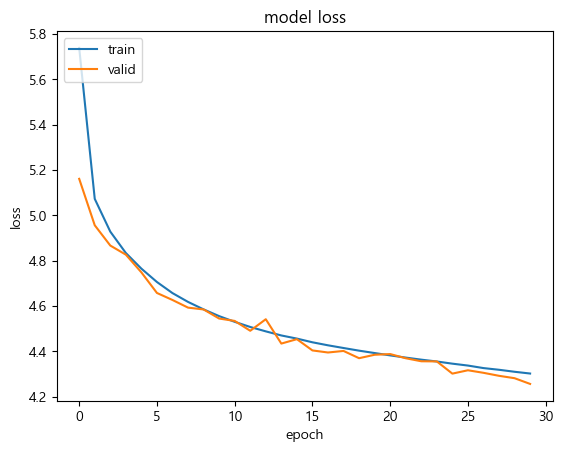

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

- 꾸준히 감소하는 추세를 보이므로, 에폭을 늘려서 학습해보기로 함

In [81]:
# 모델 컴파일
model.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history = model.fit(x_train, y_train, epochs = 500, validation_data = (x_valid, y_valid), batch_size = 32)

Epoch 1/500
117531/117531 [==============================] - 112s 950us/step - loss: 5.9220 - val_loss: 5.2850
Epoch 2/500
117531/117531 [==============================] - 112s 949us/step - loss: 5.1475 - val_loss: 4.9776
Epoch 3/500
117531/117531 [==============================] - 113s 961us/step - loss: 4.9776 - val_loss: 4.9470
Epoch 4/500
117531/117531 [==============================] - 112s 953us/step - loss: 4.8830 - val_loss: 4.7822
Epoch 5/500
117531/117531 [==============================] - 112s 955us/step - loss: 4.8102 - val_loss: 4.9330
Epoch 6/500
117531/117531 [==============================] - 112s 950us/step - loss: 4.7509 - val_loss: 4.6727
Epoch 7/500
117531/117531 [==============================] - 112s 952us/step - loss: 4.7043 - val_loss: 4.6807
Epoch 8/500
117531/117531 [==============================] - 112s 950us/step - loss: 4.6618 - val_loss: 4.6184
Epoch 9/500
117531/117531 [==============================] - 111s 946us/step - loss: 4.6267 - val_loss: 4.6111
E

- validation set이 중간중간 튀는 값을 보이긴 하나, 꾸준히 감소하는 추세를 보임
- 에폭을 더 늘려서 확인해보기

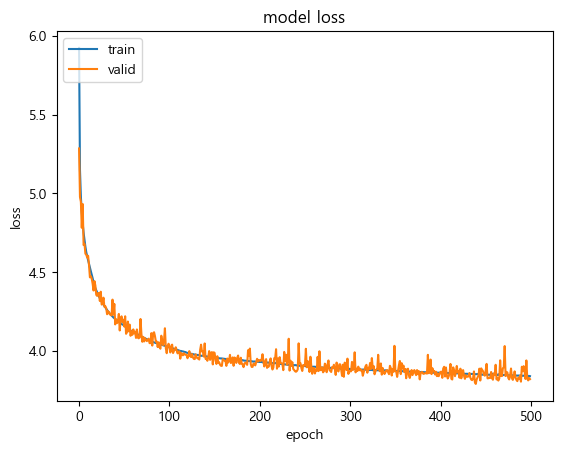

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

- 에폭을 1000으로 늘리고, 배치사이즈 조정
- 얼리스타핑을 사용하지 않고 에폭을 크게 하였을 경우, 어디까지 감소하는지 궁금하여 사용하지 않음

In [93]:
# 모델 컴파일
model.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history = model.fit(x_train, y_train, epochs = 1000, validation_data = (x_valid, y_valid), batch_size = 64)

Epoch 1/1000
58766/58766 [==============================] - 57s 963us/step - loss: 6.0765 - val_loss: 5.3884
Epoch 2/1000
58766/58766 [==============================] - 56s 955us/step - loss: 5.2160 - val_loss: 5.0645
Epoch 3/1000
58766/58766 [==============================] - 57s 964us/step - loss: 5.0424 - val_loss: 4.9903
Epoch 4/1000
58766/58766 [==============================] - 56s 959us/step - loss: 4.9524 - val_loss: 4.8692
Epoch 5/1000
58766/58766 [==============================] - 56s 957us/step - loss: 4.8889 - val_loss: 4.8857
Epoch 6/1000
58766/58766 [==============================] - 56s 957us/step - loss: 4.8311 - val_loss: 4.8264
Epoch 7/1000
58766/58766 [==============================] - 56s 954us/step - loss: 4.7742 - val_loss: 4.7128
Epoch 8/1000
58766/58766 [==============================] - 56s 960us/step - loss: 4.7132 - val_loss: 4.6656
Epoch 9/1000
58766/58766 [==============================] - 56s 954us/step - loss: 4.6681 - val_loss: 4.6436
Epoch 10/1000
58766

성능 그래프를 확인하였을 때 지속적 감소 추세가 아닌 들쭉날쭉한 경향을 보여 더 진행해보았자 엄청난 감소 효과를 기대하기는 어려워 중단함

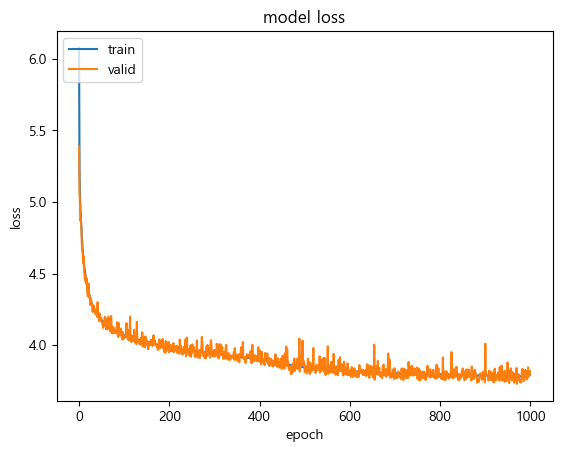

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [70]:
# test set 예측 후, 제출 파일에 저장
pred = model.predict(test)

sub['target'] = pred
sub.to_csv("data/submit_deep_1.csv", index = False)

9102/9102 [==============================] - 6s 614us/step


- 두번째 하이퍼파라미터 튜닝
    - Layer 4개, early stopping 사용 O, optimizer ADAM

In [112]:
# 모델 정의
model_2 = keras.models.Sequential([
    keras.layers.Dense(128, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               3456      
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 1)                 17        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [97]:
# 모델 컴파일
model_2.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history_2 = model_2.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 64)

Epoch 1/30
58766/58766 [==============================] - 102s 2ms/step - loss: 5.6694 - val_loss: 5.1455
Epoch 2/30
58766/58766 [==============================] - 97s 2ms/step - loss: 4.9324 - val_loss: 4.8438
Epoch 3/30
58766/58766 [==============================] - 99s 2ms/step - loss: 4.7298 - val_loss: 4.6958
Epoch 4/30
58766/58766 [==============================] - 98s 2ms/step - loss: 4.5986 - val_loss: 4.5441
Epoch 5/30
58766/58766 [==============================] - 99s 2ms/step - loss: 4.4986 - val_loss: 4.4512
Epoch 6/30
58766/58766 [==============================] - 100s 2ms/step - loss: 4.4042 - val_loss: 4.3807
Epoch 7/30
58766/58766 [==============================] - 100s 2ms/step - loss: 4.3085 - val_loss: 4.2713
Epoch 8/30
58766/58766 [==============================] - 100s 2ms/step - loss: 4.2277 - val_loss: 4.2477
Epoch 9/30
58766/58766 [==============================] - 98s 2ms/step - loss: 4.1742 - val_loss: 4.1695
Epoch 10/30
58766/58766 [==========================

- 성능 확인 시각화
    - 감소 추세 확인 가능, 과적합 (overfitting) 일어나지 않음

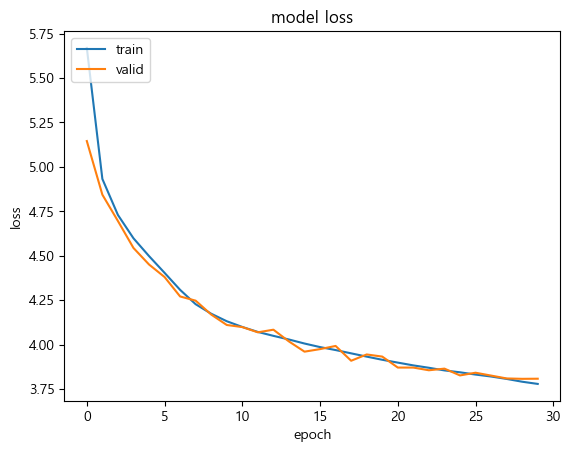

In [98]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

- validation set이 중간중간 약간씩 튀는 값을 보이긴 하나, 꾸준히 감소하는 추세를 보임
- 에폭을 더 늘리고 얼리스타핑을 사용하여 학습해봄

In [113]:
# early stopping 정의
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,  restore_best_weights = True)

# 모델 컴파일
model_2.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history_2 = model_2.fit(x_train, y_train, epochs = 1000, validation_data = (x_valid, y_valid), batch_size = 64, callbacks = [early_stopping_cb])

Epoch 1/1000
58766/58766 [==============================] - 172s 3ms/step - loss: 5.6741 - val_loss: 5.0272
Epoch 2/1000
58766/58766 [==============================] - 169s 3ms/step - loss: 4.9352 - val_loss: 4.8295
Epoch 3/1000
58766/58766 [==============================] - 169s 3ms/step - loss: 4.7504 - val_loss: 4.7080
Epoch 4/1000
58766/58766 [==============================] - 168s 3ms/step - loss: 4.6141 - val_loss: 4.5827
Epoch 5/1000
58766/58766 [==============================] - 166s 3ms/step - loss: 4.4991 - val_loss: 4.4669
Epoch 6/1000
58766/58766 [==============================] - 166s 3ms/step - loss: 4.4033 - val_loss: 4.4201
Epoch 7/1000
58766/58766 [==============================] - 168s 3ms/step - loss: 4.3226 - val_loss: 4.2845
Epoch 8/1000
58766/58766 [==============================] - 169s 3ms/step - loss: 4.2502 - val_loss: 4.2221
Epoch 9/1000
58766/58766 [==============================] - 168s 3ms/step - loss: 4.1911 - val_loss: 4.1478
Epoch 10/1000
58766/58766 [=

- 50번째 에폭에서 3.6526으로 얼리스타핑 됨

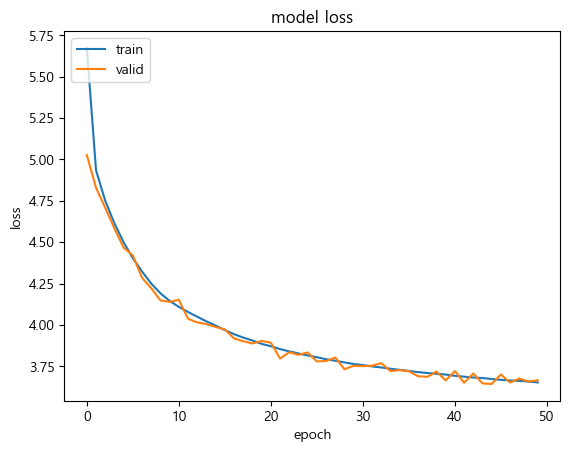

In [114]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

- 가장 성능이 좋은 두번째 하이퍼 파라미터 튜닝에서, DropOut을 사용하여 에폭을 30으로 맞춰 첫번째 피팅과 비교해 성능이 얼마나 더 떨어지는지 확인해봄

In [116]:
# 모델 정의
model_2 = keras.models.Sequential([
    keras.layers.Dense(128, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               3456      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_56 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 16)              

In [118]:
# 모델 컴파일
model_2.compile(loss = "mae", optimizer = 'adam')

# 모델 학습
history_2 = model_2.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 64)

Epoch 1/30
58766/58766 [==============================] - 210s 4ms/step - loss: 7.7337 - val_loss: 5.5637
Epoch 2/30
58766/58766 [==============================] - 208s 4ms/step - loss: 6.2854 - val_loss: 5.3640
Epoch 3/30
58766/58766 [==============================] - 207s 4ms/step - loss: 6.0235 - val_loss: 5.1059
Epoch 4/30
58766/58766 [==============================] - 205s 3ms/step - loss: 5.9246 - val_loss: 5.4912
Epoch 5/30
58766/58766 [==============================] - 207s 4ms/step - loss: 5.8760 - val_loss: 5.2382
Epoch 6/30
58766/58766 [==============================] - 207s 4ms/step - loss: 5.8419 - val_loss: 5.1340
Epoch 7/30
58766/58766 [==============================] - 206s 4ms/step - loss: 5.8224 - val_loss: 5.3564
Epoch 8/30
58766/58766 [==============================] - 207s 4ms/step - loss: 5.7978 - val_loss: 5.1077
Epoch 9/30
58766/58766 [==============================] - 206s 4ms/step - loss: 5.7781 - val_loss: 5.0845
Epoch 10/30
58766/58766 [=====================

- DropOut을 사용할 경우, 오히려 언더피팅이 되고 성능이 안 좋게 나온 것을 확인할 수 있음
- 성능이 좋았다면 에폭을 더 늘려 학습하였겠지만 그렇지 않아 추가 학습 진행하지 않음

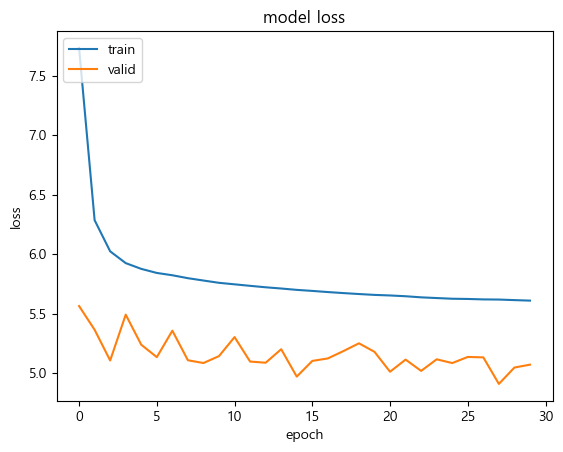

In [119]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [74]:
# test set 예측 후, 제출 파일에 저장
pred_2 = model_2.predict(test)

sub['target'] = pred_2
sub.to_csv("data/submit_deep_2.csv", index = False)

9102/9102 [==============================] - 6s 634us/step


- 세번째 하이퍼파라미터 튜닝
    - Layer 3개, early stopping 사용 O, optimizer SGD

In [75]:
model_3 = keras.models.Sequential([
    keras.layers.Dense(64, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                1728      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [76]:
# early stopping 정의
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,  restore_best_weights = True)

# 모델 컴파일
model_3.compile(loss = "mae", optimizer = keras.optimizers.SGD(lr=1e-3))

# 모델 학습
history_3 = model_3.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 64)

Epoch 1/30
58766/58766 [==============================] - 55s 935us/step - loss: 5.9599 - val_loss: 5.4626
Epoch 2/30
58766/58766 [==============================] - 55s 936us/step - loss: 5.1410 - val_loss: 5.1469
Epoch 3/30
58766/58766 [==============================] - 55s 937us/step - loss: 4.9542 - val_loss: 4.8810
Epoch 4/30
58766/58766 [==============================] - 54s 921us/step - loss: 4.8437 - val_loss: 4.8271
Epoch 5/30
58766/58766 [==============================] - 55s 939us/step - loss: 4.7684 - val_loss: 4.8090
Epoch 6/30
58766/58766 [==============================] - 55s 942us/step - loss: 4.7103 - val_loss: 4.8165
Epoch 7/30
58766/58766 [==============================] - 56s 947us/step - loss: 4.6569 - val_loss: 4.6650
Epoch 8/30
58766/58766 [==============================] - 55s 927us/step - loss: 4.6124 - val_loss: 4.9924
Epoch 9/30
58766/58766 [==============================] - 55s 939us/step - loss: 4.5744 - val_loss: 4.7926
Epoch 10/30
58766/58766 [============

- 성능 확인 시각화
    - train loss 감소 추세 확인 가능
    - 하지만 validation loss는 train loss에 비해 높은 값으로 과적합 (overfitting) 발생함
    - 추가 학습 진행하지 않음

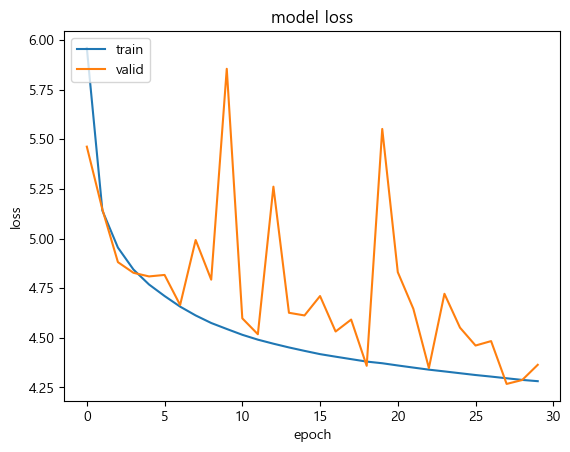

In [77]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [78]:
# test set 예측 후, 제출 파일에 저장
pred_3 = model_3.predict(test)

sub['target'] = pred_3
sub.to_csv("data/submit_deep_3.csv", index = False)

9102/9102 [==============================] - 5s 599us/step


## 8. 결론

- 가장 좋은 결과를 내는 모델은 머신러닝 `XGBoost` 모델로 제출 시, MAE 3.22878로 12/21 기준 PUBLIC 130등

- 딥러닝 모델 중에서는, 두번째 튜닝인 **Layer 4개, Early Stopping 사용, Optimizer ADAM**이 가장 좋은 성능을 냄
- 그 안에서 에폭을 1000으로 하고 얼리스타핑을 사용했을 때 3.6526까지 감소함

- 대회 최종 결과는 PRIVATE 108등으로 마무리